In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";  

In [23]:
import gensim

import os
import json
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

from underthesea import word_tokenize

In [3]:
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/data/quanvo/baomoi.model.bin', binary=True)

In [4]:
w2v_model.vectors.shape

(439056, 400)

In [10]:
import pandas as pd

In [11]:
df = pd.read_pickle('/data/quanvo/foody_data_tokenized.pkl')

In [12]:
df.shape

(174437, 14)

In [13]:
df

,time,user_name,user_link,brand_name,brand_link,review_content,review_link,avg_score,location_point,space_point,quality_point,service_point,price_point,review_content_tokenized
0,14/9/2017 11:45,Sunny,https://www.foody.vn/thanh-vien/taiyo,El Sol - Meat & Wine - Võ Thị Sáu,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,Quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,8.6,7.0,10,9,9,8.0,Quán steak hiếm_hoi mà mình cực_kì ưng_ý từ lâ...
1,14/9/2017 11:39,Nguyên Khánh,https://www.foody.vn/thanh-vien/viola_0309_tv,Busan Korean Food - Món Hàn Quốc - Đinh Tiên H...,https://www.foody.vn/ho-chi-minh/busan-korean-...,Vị trí dễ tìm. Giữ xe rất nhiệt tình. Dắt xe v...,https://www.foody.vn/ho-chi-minh/busan-korean-...,7.4,8.0,8,6,7,8.0,Vị_trí dễ tìm. Giữ xe rất nhiệt tình. Dắt xe v...
2,14/9/2017 11:34,Tú Hảo,https://www.foody.vn/thanh-vien/tuhao2509,TocoToco Bubble Tea - Cộng Hòa,https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,"Địa điểm quán dễ tìm. Không gian cũng rộng, có...",https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,6.4,7.0,8,7,7,3.0,"Địa_điểm quán dễ tìm. Không_gian cũng rộng, có..."
3,14/9/2017 11:29,Vy Nhật,https://www.foody.vn/thanh-vien/zip_zilip,Le Castella Viet Nam - Bánh Bông Lan Đài Loan ...,https://www.foody.vn/ho-chi-minh/le-castella-v...,Thấy bánh này đang hot rần rần mình cũng gọi t...,https://www.foody.vn/ho-chi-minh/le-castella-v...,7.2,7.0,6,9,6,8.0,Thấy bánh này đang hot rần_rần mình cũng gọi t...
4,14/9/2017 11:26,Tien97,https://www.foody.vn/thanh-vien/tien97,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,10.0,10.0,10,10,10,10.0,Mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...
5,14/9/2017 11:22,Vy Nhật,https://www.foody.vn/thanh-vien/zip_zilip,Gogi House - Thịt Nướng Hàn Quốc - Lê Văn Sỹ,https://www.foody.vn/ho-chi-minh/gogi-house-qu...,Hôm bữa mình và bạn vô đây ăn. Gọi 2 phần nướn...,https://www.foody.vn/ho-chi-minh/gogi-house-qu...,7.2,6.0,7,9,6,8.0,Hôm bữa mình và bạn vô đây ăn. Gọi 2 phần nướn...
6,14/9/2017 11:07,Huyền Nguyễn,https://www.foody.vn/thanh-vien/ngochuyen17595,Dunkin' Donuts - Quang Trung,https://www.foody.vn/ho-chi-minh/dunkin-donuts...,"69k của tụi mình. 2 bánh lớn, 2 ly trà sữa 1 L...",https://www.foody.vn/ho-chi-minh/dunkin-donuts...,8.0,8.0,8,9,6,9.0,"69k của tụi mình. 2 bánh lớn, 2 ly trà sữa 1 L..."
7,14/9/2017 10:56,Thùy Nguyễn,https://www.foody.vn/thanh-vien/thanhthuy3390,Koi Thé Café - Lotte Mart Nam Sài Gòn,https://www.foody.vn/ho-chi-minh/koi-the-cafe-...,Trà sữa Koi phải nói là quá ngon xuất sắc lun ...,https://www.foody.vn/ho-chi-minh/koi-the-cafe-...,8.2,9.0,7,9,8,8.0,Trà sữa Koi phải nói là quá ngon xuất_sắc lun ...
8,14/9/2017 10:53,Ngọc Nguyễn,https://www.foody.vn/thanh-vien/ngocleminh811,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Bạn muốn giết thời gian ? Bạn chán những lúc h...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,8.8,6.0,10,10,10,8.0,Bạn muốn giết thời_gian ? Bạn chán những lúc h...
9,14/9/2017 10:51,Dương,https://www.foody.vn/thanh-vien/duongduong950,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Quán nhiều game vô cùng. Nhân viên nhiệt tình ...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,8.4,6.0,9,10,9,8.0,Quán nhiều game vô cùng. Nhân_viên nhiệt_tình ...


In [15]:
# df['review_content_tokenized'] = df['review_content'].apply(lambda content: word_tokenize(content))

In [14]:
# df.to_pickle('/data/quanvo/foody_data_tokenized.pkl')

In [15]:
df['sentiment_label'] = df.avg_score.apply(lambda score: 1 if score>=7 else 0)

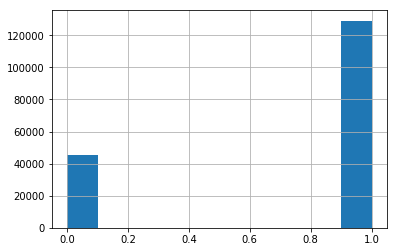

In [16]:
df['sentiment_label'].hist()

In [17]:
df.avg_score.median()

7.6

In [18]:
# load the whole embedding into memory
word2index = {}
embeddings_index = dict()
embedding_matrix = np.zeros((len(w2v_model.vocab), 400))

for i, word in enumerate(w2v_model.vocab):
    embeddings_index[word] = w2v_model.get_vector(word)
    
    word2index[word] = i
    
    embedding_vector = w2v_model.get_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [22]:
# with open('word2index.json', 'w') as handle:
#     json.dump(word2index, handle)

In [44]:
# define documents
docs = df.review_content_tokenized.tolist()

# define class labels
labels = np.array(df.sentiment_label.tolist())

# integer encode the documents
encoded_docs = []
for doc in docs:
    encoded_docs.append([word2index.get(word.lower(), 0) for word in doc.split()])

# print(encoded_docs)

# pad documents to a max length of 200 words
max_length = 200
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[  907 76150  4316 ...     0     0     0]
 [  401   544     0 ...     0     0     0]
 [ 1636   907   544 ...     0     0     0]
 ...
 [    0     0  1767 ...     0     0     0]
 [    0     0  1767 ...     0     0     0]
 [    0     0  1767 ...     0     0     0]]


In [45]:
padded_docs.shape

(174437, 200)

In [46]:
labels.shape

(174437,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.25, random_state=42)

In [29]:
model = Sequential()

model.add(Embedding(len(embeddings_index), 400, weights=[embedding_matrix], input_length=200, trainable=False))

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))
# Adam Optimiser
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

# save the best model and early stopping
saveBestModel = keras.callbacks.ModelCheckpoint('lstm_best_weight_70_token.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 400)          175622400 
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               270848    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 175,959,809
Trainable params: 337,409
Non-trainable params: 175,622,400
_________________________________________________________________
None


In [23]:
# fit the model
model.fit(X_train, y_train, epochs=50, batch_size=250, validation_split=0.25, verbose=2, callbacks=[saveBestModel])
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

Train on 98120 samples, validate on 32707 samples
Epoch 1/50
 - 86s - loss: 0.5361 - acc: 0.7546 - val_loss: 0.4798 - val_acc: 0.7841
Epoch 2/50
 - 79s - loss: 0.4748 - acc: 0.7912 - val_loss: 0.4542 - val_acc: 0.8023
Epoch 3/50
 - 76s - loss: 0.4550 - acc: 0.8029 - val_loss: 0.4413 - val_acc: 0.8103
Epoch 4/50
 - 76s - loss: 0.4427 - acc: 0.8103 - val_loss: 0.4387 - val_acc: 0.8120
Epoch 5/50
 - 76s - loss: 0.4337 - acc: 0.8139 - val_loss: 0.4337 - val_acc: 0.8130
Epoch 6/50
 - 76s - loss: 0.4310 - acc: 0.8149 - val_loss: 0.4342 - val_acc: 0.8144
Epoch 7/50
 - 76s - loss: 0.4221 - acc: 0.8192 - val_loss: 0.4314 - val_acc: 0.8153
Epoch 8/50
 - 76s - loss: 0.4175 - acc: 0.8218 - val_loss: 0.4331 - val_acc: 0.8160
Epoch 9/50
 - 76s - loss: 0.4131 - acc: 0.8230 - val_loss: 0.4274 - val_acc: 0.8158
Epoch 10/50
 - 76s - loss: 0.4125 - acc: 0.8240 - val_loss: 0.4297 - val_acc: 0.8158
Epoch 11/50
 - 76s - loss: 0.4071 - acc: 0.8255 - val_loss: 0.4312 - val_acc: 0.8166
Epoch 12/50
 - 76s - los

In [24]:
accuracy

0.8131162577417842

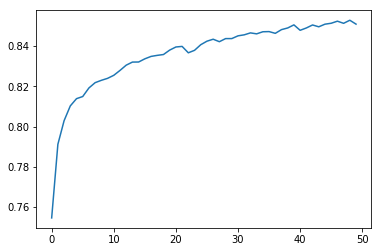

In [29]:
plt.plot(model.history.history['acc'])

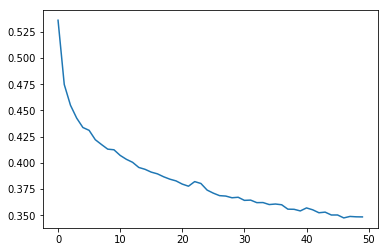

In [30]:
plt.plot(model.history.history['loss'])

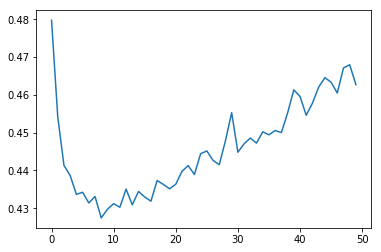

In [31]:
plt.plot(model.history.history['val_loss'])

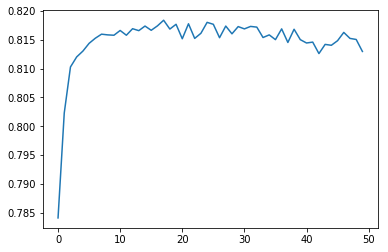

In [26]:
plt.plot(model.history.history['val_acc'])

In [27]:
model.save_weights("lstm_weight_70.h5")

In [20]:
model.load_weights("lstm_weight_70.h5")

In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
y_pred_prob = model.predict(X_test)

In [35]:
y_pred = [1 if x>=0.5 else 0 for x in y_pred_prob.reshape(1, -1)[0]]

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5613,  5661],
       [ 2489, 29847]])

In [37]:
# precision
cm[1][1] / (cm[1][1] + cm[0][1])

0.8405711388982764

In [38]:
# recall
cm[0][0] / (cm[0][0] + cm[1][0])

0.6927919032337695

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test, a, average='macro')

0.7296240090748822

### load model

In [3]:
import os
import json
import numpy as np
import gensim

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from underthesea import word_tokenize

class SentimenModel:
    def __init__(self):
        self.max_phrase_length = 200 # max phrase length
        self.model = None
        self.word2index = None
    def init_model_architect(self):        
        self.embedding_matrix = np.zeros((439056, 400))
        model = Sequential()
        model.add(Embedding(439056, 400, weights=[self.embedding_matrix], input_length=200, trainable=False))

        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.50))
        model.add(Dense(1, activation='sigmoid'))
        # Adam Optimiser
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model = model

    def load_model_from_path(self, model_dir_path):
        model_path = os.path.join(model_dir_path, 'lstm_best_weight_70.hdf5')
        word2index_path = os.path.join(model_dir_path, 'word2index.json')
        self.init_model_architect()
        self.model.load_weights(model_path)
        self.graph = tf.get_default_graph()
        with open(word2index_path, 'r') as handle:
            self.word2index = json.load(handle)
        self.tokenize_model = CRFModel.instance('/dl/quan_vo/sentiment/word_tokenize/egs/vlsp2013_crf/word_tokenize/model_vlsp2013_10000.bin')

    def word_tokenize(self, sentence, format='text'):
        model = self.tokenize_model
        tokens = sentence.split()
        output = model.predict(tokens)
        tokens = [token[0] for token in output]
        tags = [token[1] for token in output]
        output = []
        for tag, token in zip(tags, tokens):
            if tag == "I-W":
                output[-1] = output[-1] + " " + token
            else:
                output.append(token)
        if format == "text":
            output = u" ".join([item.replace(" ", "_") for item in output])
        return output

    def _preprocess_inputs(self, comments):
        # one-hot encoding + padding
        encoded_phrases = [[self.word2index.get(word.lower(), 0) for word in self.word_tokenize(comment).split()] for comment in comments]
        padded_phrases = pad_sequences(encoded_phrases, maxlen=self.max_phrase_length, padding='post')
        return padded_phrases

    def predict(self, comments):
        if self.model != None:
            padded_phrases = self._preprocess_inputs(comments)
            with self.graph.as_default():
                probs = self.model.predict(padded_phrases).reshape(1, len(padded_phrases))[0]
            
            comments = [(cm, probs[i]) for i, cm in enumerate(comments)]

        return comments

In [4]:
model = SentimenModel()
model.load_model_from_path('./')

In [5]:
model.predict(['dở quá', 'quán chật chội', 'ngon', 'đồ ăn khá ngon', 'không ngon', 'gà không ngon', 'gà ngon', 'gà ngon nhưng bò dở', 'quán lên món chậm', 'quán lên món rất chậm'])

[('dở quá', 0.04671543),
 ('quán chật chội', 0.26431507),
 ('ngon', 0.7260459),
 ('đồ ăn khá ngon', 0.6686338),
 ('không ngon', 0.38668156),
 ('gà không ngon', 0.43481863),
 ('gà ngon', 0.67185706),
 ('gà ngon nhưng bò dở', 0.07961241),
 ('quán lên món chậm', 0.31620795),
 ('quán lên món rất chậm', 0.19590428)]